In [21]:
import matplotlib.pylab as pb
import numpy as np
from skimage.segmentation import mark_boundaries
from spectral import envi

from hsi.modules.clustering.hslic import HSLIC

In [22]:
# Load data
f = envi.open('/home/canas/Repositories/Work/Data/hiperespectral/2002527916_Subset_Envi.hdr', 
              '/home/canas/Repositories/Work/Data/hiperespectral/2002527916_Subset_Envi.raw')
f

	Data Source:   '/home/canas/Repositories/Work/Data/hiperespectral/2002527916_Subset_Envi.raw'
	# Rows:             78
	# Samples:          87
	# Bands:             9
	Interleave:        BSQ
	Quantization:   8 bits
	Data format:     uint8

In [23]:
hslic = HSLIC(m=0, k=10, hsi=True)

In [24]:
cube = f.asarray()

In [25]:
mask = np.ones(cube.shape[:2]).astype(bool)

In [26]:
# point-cloud
pc = cube[mask]

In [27]:
x = np.arange(mask.shape[0])
y = np.arange(mask.shape[1])

In [28]:
mesh = np.dstack(np.meshgrid(x, y))

In [29]:
x, y = mesh.swapaxes(0, 2).reshape(2, len(pc))

In [30]:
pc = np.hstack([x.reshape(-1, 1), y.reshape(-1, 1), pc])
pc[100]

array([  1,  13, 129, 128,  89,  67,  68,  71,  71,  79,  85])

In [31]:
hslic.load_data(pc, ndims=2)

In [32]:
hslic.data_positions

array([[ 0,  0],
       [ 0,  1],
       [ 0,  2],
       ..., 
       [77, 84],
       [77, 85],
       [77, 86]])

In [33]:
hslic.compute_step()

In [34]:
hslic.build_centroids()

/home/canas/Repositories/Work/hsi/src/python/hsi/modules/clustering/hslic.py:152: RuntimeWarning: Mean of empty slice.
  new_pos = self.data_positions[mask].mean(axis=0)
/home/canas/Programs/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [35]:
hslic.compute_error()

In [36]:
for it in range(10):
    hslic.compute_distance()
    hslic.compute_error()

ValueError: array must not contain infs or NaNs

In [18]:
segments = hslic.segments.reshape(cube.shape[:2])

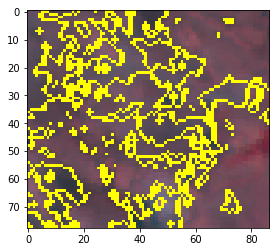

In [19]:
%matplotlib inline
import matplotlib.pylab as pb
from skimage.segmentation import mark_boundaries
im = mark_boundaries(cube[:, :, [2, 5, 8]], segments)
pb.imshow(im)
#pb.imshow(segments/segments.max()*255, alpha=0.8)

In [20]:
np.unique(segments)

array([ 0, 15])